In [43]:
# Importing the pandas library as 'pd'
import pandas as pd

# Importing the numpy library as 'np'
import numpy as np

import seaborn as sns

import statsmodels.api as sm

In [68]:
# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.2f}'.format

In [69]:
# importing data from csv outputed from 2_cleaning notebook.
data =  pd.read_csv('../data/clean_df.csv')
data

,id,year,date,time,timezone,datetime_utc,state,state_fips,magnitude,injuries,...,length(m),width(m),num_of_states,state_num,f1,f2,f3,f4,mag_estimated,avg_tempc_year
0,192,1950,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,1.00,0,...,25427.57,9.14,1,1,25,0,0,0,False,10.77
1,193,1950,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,3.00,3,...,3218.68,804.67,1,1,47,0,0,0,False,10.77
2,195,1950,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,2.00,0,...,160.93,9.14,1,1,177,0,0,0,False,10.77
3,196,1950,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,1.00,0,...,160.93,9.14,1,1,209,0,0,0,False,10.77
4,197,1950,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,1.00,3,...,3218.68,33.83,1,1,101,0,0,0,False,10.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64852,618354,2019,2019-09-09,14:37:00,America/Chicago,2019-09-09T19:37:00Z,SD,46,0.00,0,...,4152.10,18.29,1,1,29,0,0,0,False,11.48
64853,618355,2019,2019-09-09,14:39:00,America/Chicago,2019-09-09T19:39:00Z,SD,46,0.00,0,...,5149.89,36.58,1,1,57,0,0,0,False,11.48
64854,618358,2019,2019-09-09,17:55:00,America/Chicago,2019-09-09T22:55:00Z,SD,46,0.00,0,...,160.93,9.14,1,1,37,0,0,0,False,11.48
64855,618359,2019,2019-09-09,19:03:00,America/Chicago,2019-09-10T00:03:00Z,SD,46,1.00,0,...,2510.57,73.15,1,1,37,0,0,0,False,11.48


In [7]:
# import normalized data 
data_norm =  pd.read_csv('../data/clean_df_normalized.csv')
data_norm

,id,year,date,time,timezone,datetime_utc,state,state_fips,magnitude,injuries,...,width(m),num_of_states,state_num,f1,f2,f3,f4,mag_estimated,avg_tempc_year,prop_loss
0,192,1950,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,1.0,0.000000,...,0.002185,1,1,25,0,0,0,False,0.115698,0.000018
1,193,1950,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,3.0,0.001724,...,0.192308,1,1,47,0,0,0,False,0.115698,0.000179
2,195,1950,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,2.0,0.000000,...,0.002185,1,1,177,0,0,0,False,0.115698,0.000179
3,196,1950,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,1.0,0.000000,...,0.002185,1,1,209,0,0,0,False,0.115698,0.000179
4,197,1950,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,1.0,0.001724,...,0.008086,1,1,101,0,0,0,False,0.115698,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64852,618354,2019,2019-09-09,14:37:00,America/Chicago,2019-09-09T19:37:00Z,SD,46,0.0,0.000000,...,0.004371,1,1,29,0,0,0,False,0.406362,0.000018
64853,618355,2019,2019-09-09,14:39:00,America/Chicago,2019-09-09T19:39:00Z,SD,46,0.0,0.000000,...,0.008741,1,1,57,0,0,0,False,0.406362,0.000018
64854,618358,2019,2019-09-09,17:55:00,America/Chicago,2019-09-09T22:55:00Z,SD,46,0.0,0.000000,...,0.002185,1,1,37,0,0,0,False,0.406362,0.000018
64855,618359,2019,2019-09-09,19:03:00,America/Chicago,2019-09-10T00:03:00Z,SD,46,1.0,0.000000,...,0.017483,1,1,37,0,0,0,False,0.406362,0.000018


Assumption: each id represents a unique tornado

In [52]:
# get total # of tornadoes per year
# confirm id has duplicates and each ID represents one tornado
data['id'].value_counts()

id
56        62
192       61
140       61
90        61
91        61
          ..
449653     1
449729     1
450558     1
450559     1
618360     1
Name: count, Length: 12172, dtype: int64

In [61]:
# convert original data to summary data by year
annual = data.groupby("year").agg({"id": pd.Series.nunique,'prop_loss':'mean', 'injuries': 'sum', 'magnitude': 'mean', 'avg_tempc_year': 'mean'}).reset_index().rename(columns={'id':'sum_tornadoes', 'magnitude': 'avg_magnitude','prop_loss': 'avg_prop_loss', 'injuries': 'sum_injuries'})
annual
# data.loc[data['date'] == '2007-05-05',['id', 'year', 'date', 'time', 'timezone', 'state', 'num_of_states', 'state_num', 'state_fips', 'f1', 'f2', 'f3','f4']]

,year,sum_tornadoes,avg_prop_loss,sum_injuries,avg_magnitude,avg_tempc_year
0,1950,201,319441,659,2,11
1,1951,260,539873,524,1,11
2,1952,240,740926,1915,2,11
3,1953,421,2535398,5131,2,12
4,1954,550,290994,715,1,12
...,...,...,...,...,...,...
65,2015,1176,619297,921,1,12
66,2016,946,442932,325,1,13
67,2017,1364,807382,518,1,13
68,2018,1109,1184194,199,1,12


<AxesSubplot:xlabel='total_year', ylabel='avg_tempc_year'>

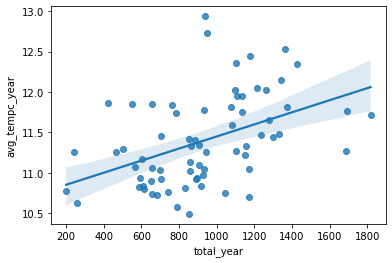

In [29]:
# Create regression plot with Seaborn
sns.regplot(data=annual, x='total_year', y='avg_tempc_year', )

In [64]:
annual.columns

Index(['year', 'sum_tornadoes', 'avg_prop_loss', 'sum_injuries',
       'avg_magnitude', 'avg_tempc_year'],
      dtype='object')

##### mistake - just use normalized data set..

In [72]:
annual_scaled = annual.copy()

# apply normalization techniques for each numeric column 
columns_list = ['sum_tornadoes', 'avg_prop_loss', 'sum_injuries',
       'avg_magnitude', 'avg_tempc_year'],

for column in columns_list:
    annual_scaled[column] = (annual_scaled[column] - annual_scaled[column].min()) / (annual_scaled[column].max() - annual_scaled[column].min())    



annual_scaled

,year,sum_tornadoes,avg_prop_loss,sum_injuries,avg_magnitude,avg_tempc_year
0,1950,0.00,0.01,0.07,0.93,0.12
1,1951,0.04,0.03,0.05,0.74,0.05
2,1952,0.02,0.06,0.26,1.00,0.32
3,1953,0.14,0.26,0.74,0.87,0.56
4,1954,0.22,0.01,0.08,0.74,0.56
...,...,...,...,...,...,...
65,2015,0.60,0.04,0.11,0.06,0.80
66,2016,0.46,0.02,0.02,0.13,0.92
67,2017,0.72,0.06,0.05,0.19,0.83
68,2018,0.56,0.11,0.00,0.09,0.60


<AxesSubplot:xlabel='total_year_scaled', ylabel='avg_tempc_year_scaled'>

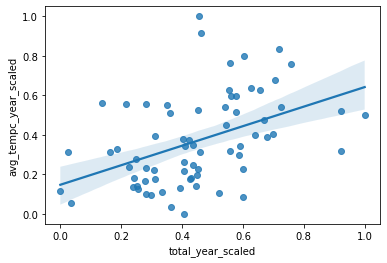

In [42]:
# Create regression plot with Seaborn
sns.regplot(data=annual_scaled, x='total_year_scaled', y='avg_tempc_year_scaled', )

### Model:
Simple lin reg - option 1 “can annual avg temperature predict the frequency of tornadoes?”
Y = Dependent variable: frequency of tornadoes per year 
X = independent variables- annual avg temperature, 

In [71]:
#run full model
y = annual_scaled['sum_tornadoes']
X = annual_scaled['avg_tempc_year']
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          sum_tornadoes   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     16.75
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           0.000115
Time:                        18:05:08   Log-Likelihood:                 19.787
No. Observations:                  70   AIC:                            -35.57
Df Residuals:                      68   BIC:                            -31.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3010      0.042      7.

#### Interpretation:
* avg temperature per year is statistically significant in predicting the number of tornadoes.
* Relatively low adj r square value of .186, indicates a relatively weak model


In [10]:
data['date'].value_counts()

2011-04-27    207
1974-04-03    128
2003-06-24     95
2011-05-25     93
2007-05-05     90
             ... 
1996-03-31      1
1996-03-15      1
1964-04-14      1
1996-02-27      1
1950-10-01      1
Name: date, Length: 11948, dtype: int64